# Homework 2: Lasso Regression

In [1]:
%load_ext autoreload
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd

from setup_problem import load_problem

In [2]:
lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize\
    = load_problem(lasso_data_fname)

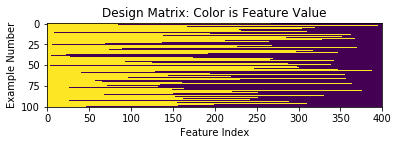

In [3]:
# Generate features
X_train = featurize(x_train)
X_val = featurize(x_val)

#Visualize training data
fig, ax = plt.subplots()
ax.imshow(X_train)
ax.set_title("Design Matrix: Color is Feature Value")
ax.set_xlabel("Feature Index")
ax.set_ylabel("Example Number")
plt.show(block=False)

## 2 Ridge Regression

In the problems below, you do not need to implement ridge regression. You may use any of the code provided in the assignment, or you may use other packages. However, your results must correspond to the ridge regression objective function that we use, namely
$$ J(w;\lambda)=\frac{1}{n}\sum_{i=1}^{n}(w^T x_i - y_i)^2 + \lambda ||w||^2$$

1. Run ridge regression on the provided training dataset. Choose the $\lambda$ that minimizes the empirical risk (i.e. the average square loss) on the validation set. Include a table of the parameter values you tried and the validation performance for each. Also include a plot of the results.

**Answer**: As shown in the figure below, when $\lambda=0.01$, we have the minimal average square loss $0.141887$ on validation set.

    param_l2reg  mean_test_score  mean_train_score
0      0.000001         0.172579          0.006752
1      0.000010         0.172464          0.006752
2      0.000100         0.171345          0.006774
3      0.001000         0.162705          0.008285
4      0.010000         0.141887          0.032767
5      0.100000         0.144566          0.094953
6      1.000000         0.171068          0.197694
7      1.300000         0.179521          0.216591
8      1.600000         0.187993          0.233450
9      1.900000         0.196361          0.248803
10     2.200000         0.204553          0.262958
11     2.500000         0.212530          0.276116
12     2.800000         0.220271          0.288422


Text(0,0.5,'Mean Squared Error')

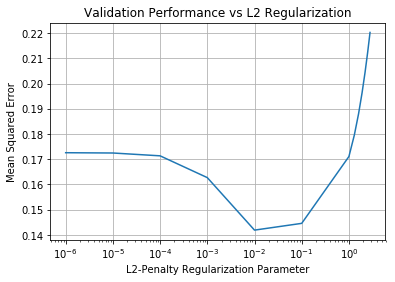

In [4]:
from ridge_regression import do_grid_search_ridge

# Do hyperparameter tuning with our ridge regression
grid, results = do_grid_search_ridge(X_train, y_train, X_val, y_val)
print(results)

# Plot validation performance vs regularization parameter
fig, ax = plt.subplots()
ax.semilogx(results["param_l2reg"], results["mean_test_score"])
ax.grid()
ax.set_title("Validation Performance vs L2 Regularization")
ax.set_xlabel("L2-Penalty Regularization Parameter")
ax.set_ylabel("Mean Squared Error")

2. Now we want to visualize the prediction functions. On the same axes, plot the following: the training data, the target function, an unregularized least squares fit (still using the featurized data), and the prediction function chosen in the previous problem. Next, along the lines of the bar charts produced by the code in compare_parameter_vectors, visualize the coefficients for each of the prediction functions plotted, including the target function. Describe the patterns, including the scale of the coefficients, as well as which coefficients have the most weight.

**Answer**: The predition function chosen in the previous problem is $\lambda = 0.01$; The coefficient in the bayes optimal target function is sparse, i.e., only a few have non-zero values and the scale ranges from $-0.718$ to $2.070$; for $\lambda=0.01$, the scale ranges from $-0.513$ to $0.422$.

[0.    0.001 0.002 ... 0.997 0.998 0.999]


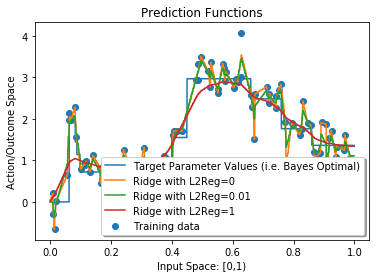

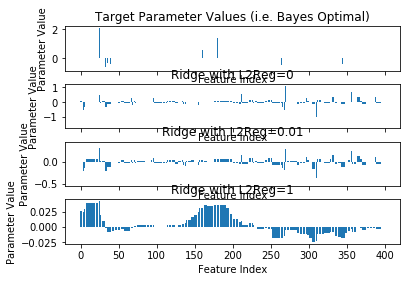

In [5]:
from ridge_regression import RidgeRegression
from ridge_regression import plot_prediction_functions
from ridge_regression import compare_parameter_vectors 

# Let's plot prediction functions and compare coefficients for several fits
# and the target function.
pred_fns = []
x = np.sort(np.concatenate([np.arange(0,1,.001), x_train]))
print(x)
name = "Target Parameter Values (i.e. Bayes Optimal)"
pred_fns.append({"name":name, "coefs":coefs_true, "preds": target_fn(x) })
# print('true coefficient range from {} to {}'.format(np.min(coefs_true),\
#     np.max(coefs_true)))

l2regs = [0, grid.best_params_['l2reg'], 1]
X = featurize(x)
for l2reg in l2regs:
    ridge_regression_estimator = RidgeRegression(l2reg=l2reg)
    ridge_regression_estimator.fit(X_train, y_train)
    name = "Ridge with L2Reg="+str(l2reg)
    pred_fns.append({"name":name,
                     "coefs":ridge_regression_estimator.w_,
                     "preds": ridge_regression_estimator.predict(X) })
#     print('{} ranges from {} to {}'.format(name,\
#         np.min(ridge_regression_estimator.w_),\
#         np.max(ridge_regression_estimator.w_)))

f = plot_prediction_functions(x, pred_fns, x_train, y_train, legend_loc="best")
f = compare_parameter_vectors(pred_fns)

In [6]:
x_train

array([0.66656527, 0.21099131, 0.98576502, 0.83007921, 0.4173425 ,
       0.79914531, 0.75793622, 0.57063288, 0.57901931, 0.11847408,
       0.7728778 , 0.01846007, 0.48549037, 0.90532834, 0.34524665,
       0.52598929, 0.87812873, 0.71102939, 0.91785725, 0.81949944,
       0.52841268, 0.18444641, 0.66066791, 0.34151433, 0.17131441,
       0.0145817 , 0.67005126, 0.56746115, 0.30953677, 0.92460315,
       0.22157251, 0.18305074, 0.7936761 , 0.7412013 , 0.96562532,
       0.86924979, 0.47947701, 0.05568619, 0.01052375, 0.06852684,
       0.61011903, 0.43422072, 0.67360635, 0.66433739, 0.85583472,
       0.23127884, 0.16737973, 0.3100852 , 0.71910866, 0.84699593,
       0.00771939, 0.74271395, 0.75167063, 0.94228665, 0.61627136,
       0.86785038, 0.96914286, 0.32087559, 0.10226573, 0.11437291,
       0.48689924, 0.88819266, 0.36110722, 0.549953  , 0.24197779,
       0.13234472, 0.89236379, 0.57310452, 0.14130257, 0.1643654 ,
       0.40078095, 0.08202477, 0.90844137, 0.33647625, 0.17849

3. For the chosen $\lambda$, examine the model coefficients. For ridge regression, we don’t expect any parameters to be exactly $0$. However, let’s investigate whether we can predict the sparsity pattern of the true parameters (i.e. which parameters are $0$ and which are nonzero) by thresholding the parameter estimates we get from ridge regression. We’ll predict that $w_i = 0, \text{if } |\hat{w}_i| < \epsilon$ and $w_i\neq 0$ otherwise. Give the confusion matrix for $\epsilon = 10^{−6}, 10^{−3}, 10^{−1}$, and any other thresholds you would like to try.

Confusion matrix, without normalization
[[  5 385]
 [  0  10]]
Confusion matrix, without normalization
[[  8 382]
 [  0  10]]
Confusion matrix, without normalization
[[ 53 337]
 [  0  10]]
Confusion matrix, without normalization
[[349  41]
 [  3   7]]


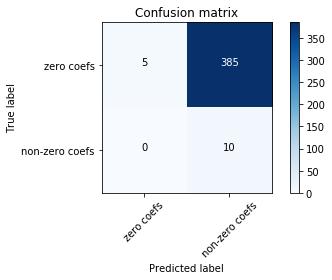

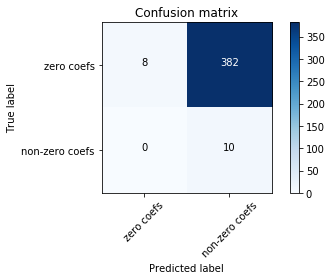

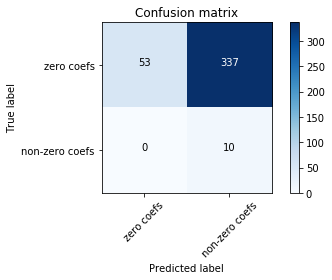

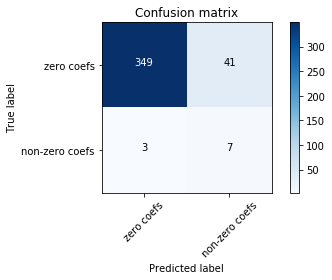

In [7]:
import itertools
from sklearn.metrics import confusion_matrix

# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Given the weights in \lambda = 0.01
epsilon_list = [10**-6, 10**-3, 10**-2, 10**-1]

true_coefs = pred_fns[0]["coefs"]
true_coefs[true_coefs != 0] = 1
orig_predict_coefs = pred_fns[2]["coefs"]

for epsilon in epsilon_list:
    predict_coefs = orig_predict_coefs.copy()
    predict_coefs[np.abs(predict_coefs) < epsilon] = 0
    predict_coefs[predict_coefs != 0] = 1
    cm = confusion_matrix(true_coefs, predict_coefs)
    plt.figure()
    plot_confusion_matrix(cm, classes=['zero coefs', 'non-zero coefs'])

## 3 Coordinate Descent for Lasso (a.k.a. The Shooting algo- rithm)
### 3.1 Experiments with the Shooting Algorithm

1. The algorithm as described above is not ready for a large dataset (at least if it has being implemented in Python) because of the implied loop in the summation signs for the expressions for $a_j$ and $c_j$. Give an expression for computing $a_j$ and $c_j$ using matrix and vector operations, without explicit loops. This is called “vectorization” and can lead to dramatic speedup when implemented in languages such as Python, Matlab, and R. Write your expressions using $X$, $w$, $y = (y_1, . . . , y_n)^T$ (the column vector of responses), $X_{·j}$ (the $j$th column of $X$, represented as a column matrix), and $w_j$ (the jth coordinate of w – a scalar).

$$a_j = 2X_{·j}^T X_{·j}$$
$$c_j = 2X_{·j}^T (y-Xw+w_jX_{·j})$$

2. Write a function that computes the Lasso solution for a given $\lambda$ using the shooting algorithm described above. For convergence criteria, continue coordinate descent until a pass through the coordinates reduces the objective function by less than $10^{−8}$, or you have taken $1000$ passes through the coordinates. Compare performance of cyclic coordinate descent to randomized coordinate descent, where in each round we pass through the coordinates in a different random order (for your choices of $\lambda$). Compare also the solutions attained (following the convergence criteria above) for starting at $0$ versus starting at the ridge regression solution suggested by Murphy (again, for your choices of $\lambda$). If you like, you may adjust the convergence criteria to try to attain better results (or the same results faster).

**Answer**: 1) with randomized coordinate descent, the convergence is faster; 2) When using ridge regression solution suggested by Murphy, it converges faster.

In [8]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer

class LassoRegression(BaseEstimator, RegressorMixin):
    """ lasso regression"""
    
    def __init__(self, l1reg=1, random=False):
        if l1reg < 0:
            raise ValueError('Regularization penalty should be at least 0.')
        self.l1reg = l1reg
        self.random = random

    def coordinate_descent_lasso(self, X, y, w=None):
        def compute_soft(a, b):
            return np.sign(a)*(np.max([0, np.abs(a)-b]))
        
        n, num_ftrs = X.shape
        epsilon = 10**-8
        num_epoches = 1000
        self.w_ = np.zeros(num_ftrs) if w is None else w
        X = X[:,np.random.permutation(num_ftrs)] if self.random else X

        square_loss_list = np.zeros(num_epoches+1)
        square_loss_list[0] = self.score(X, y)

        for i in np.arange(num_epoches):
            for j in np.arange(num_ftrs):
                aj = 2*X[:,j].dot(X[:,j])
                cj = 2*X[:,j].dot(y-X.dot(self.w_)+self.w_[j]*X[:,j])
                self.w_[j] = 0 if aj == 0 else compute_soft(cj/aj, self.l1reg/aj)
            square_loss_list[i+1] = self.score(X, y)
            if np.abs(square_loss_list[i+1]-square_loss_list[i]) < epsilon:
                break
        return self.w_, square_loss_list
    
    def fit(self, X, y=None, w=None):
        # convert y to 1-dim array, in case we're given a column vector
        y = y.reshape(-1)
        self.w_, self.square_loss_ = self.coordinate_descent_lasso(X,y,w)
        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "w_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        return np.dot(X, self.w_)

    def score(self, X, y):
        # Average square error
        try:
            getattr(self, "w_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        residuals = self.predict(X) - y
        return np.dot(residuals, residuals)/len(y)

# Grid search for LASSO
def do_grid_search_lasso(X_train, y_train, X_val, y_val, l1reg = np.concatenate((10.**np.arange(-6,1,1), np.arange(1,3,.3)))):
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    val_fold = [-1]*len(X_train) + [0]*len(X_val) #0 corresponds to validation

    param_grid = [{'l1reg':np.unique(l1reg) }]

    lasso_regression_estimator = LassoRegression()
    grid = GridSearchCV(lasso_regression_estimator,
                        param_grid,
                        return_train_score=True,
                        cv = PredefinedSplit(test_fold=val_fold),
                        refit = True,
                        scoring = make_scorer(mean_squared_error,
                                              greater_is_better = False))
    grid.fit(X_train_val, y_train_val)

    df = pd.DataFrame(grid.cv_results_)
    # Flip sign of score back, because GridSearchCV likes to maximize,
    # so it flips the sign of the score if "greater_is_better=FALSE"
    df['mean_test_score'] = -df['mean_test_score']
    df['mean_train_score'] = -df['mean_train_score']
    cols_to_keep = ["param_l1reg", "mean_test_score","mean_train_score"]
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = df_toshow.sort_values(by=["param_l1reg"])
    return grid, df_toshow

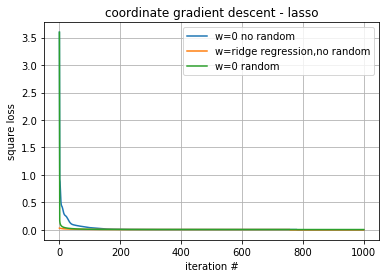

In [9]:
l1_reg = 0.01
num_epoches = 1000

# Test lasso given lambda with initial w = 0 without random
lasso_regression_estimator0 = LassoRegression(l1reg=l1_reg, random=False)
lasso_regression_estimator0.fit(X_train, y_train)
plt.plot(np.arange(num_epoches+1), lasso_regression_estimator0.square_loss_)

# Test lasso given lambda with initial w = ridge regression w' without random
lasso_regression_estimator1 = LassoRegression(l1reg=l1_reg, random=False)
lasso_regression_estimator1.fit(X_train, y_train, orig_predict_coefs)
plt.plot(np.arange(num_epoches+1), lasso_regression_estimator1.square_loss_)

# Test lasso given lambda with initial w = 0 with random coordinate descent
lasso_regression_estimator2 = LassoRegression(l1reg=l1_reg, random=True)
lasso_regression_estimator2.fit(X_train, y_train)
plt.plot(np.arange(num_epoches+1), lasso_regression_estimator2.square_loss_)

plt.xlabel('iteration #')
plt.ylabel('square loss')
plt.title('coordinate gradient descent - lasso')
plt.legend(['w=0 no random', 'w=ridge regression,no random', 'w=0 random'])
plt.grid(True)

3. Run your best Lasso configuration on the training dataset provided, and select the $\lambda$ that minimizes the square error on the validation set. Include a table of the parameter values you tried and the validation performance for each. Also include a plot of these results. Include also a plot of the prediction functions, just as in the ridge regression section, but this time add the best performing Lasso prediction function and remove the unregularized least squares fit. Similarly, add the lasso coefficients to the bar charts of coefficients generated in the ridge regression setting. Comment on the results, with particular attention to parameter sparsity and how the ridge and lasso solutions compare. What’s the best model you found, and what’s its validation performance?

**Answer**: The best performance on validation set when $\lambda=1.6$. Compared with ridge solution, lasso regression generates a sparsity solution. The square loss on validation set is $0.167135$ when $\lambda=1.6$.

    param_l1reg  mean_test_score  mean_train_score
0      0.000001         0.228102          0.006753
1      0.000010         0.228099          0.006753
2      0.000100         0.228075          0.006753
3      0.001000         0.227831          0.006753
4      0.010000         0.225435          0.006805
5      0.100000         0.207950          0.011137
6      1.000000         0.167821          0.091949
7      1.300000         0.167313          0.096653
8      1.600000         0.167135          0.099934
9      1.900000         0.167408          0.103894
10     2.200000         0.168252          0.108347
11     2.500000         0.171153          0.112941
12     2.800000         0.170967          0.117898


Text(0,0.5,'Mean Squared Error')

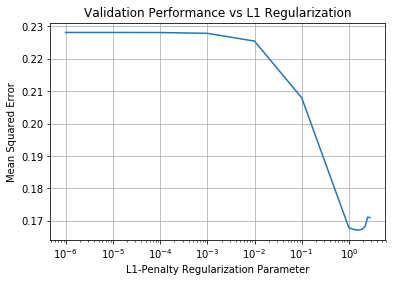

In [10]:
l1reg = np.concatenate((10.**np.arange(-6,1,1), np.arange(1,3,.3)))
l1grid, l1results = do_grid_search_lasso(X_train, y_train, X_val, y_val, l1reg)
print(l1results)

# Plot validation performance vs regularization parameter
fig, ax = plt.subplots()
ax.semilogx(l1results["param_l1reg"], l1results["mean_test_score"])
ax.grid()
ax.set_title("Validation Performance vs L1 Regularization")
ax.set_xlabel("L1-Penalty Regularization Parameter")
ax.set_ylabel("Mean Squared Error")

Lasso with L1Reg=1.6 ranges from -0.6487705286009171 to 1.2337069209572415


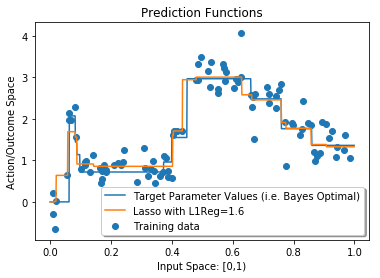

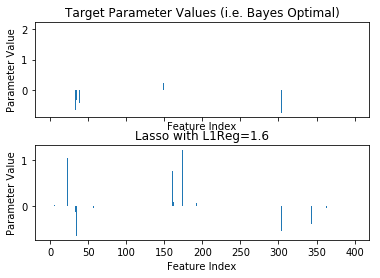

In [12]:
from ridge_regression import plot_prediction_functions
from ridge_regression import compare_parameter_vectors

lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize\
    = load_problem(lasso_data_fname)

# Let's plot prediction functions and compare coefficients for several fits
# and the target function.
l1_pred_fns = []
x = np.sort(np.concatenate([np.arange(0,1,.001), x_train]))
name = "Target Parameter Values (i.e. Bayes Optimal)"
l1_pred_fns.append({"name":name, "coefs":coefs_true, "preds":target_fn(x)})

l1regs = [l1grid.best_params_['l1reg']]
X = featurize(x)
for l1reg in l1regs:
    lasso_regression_estimator = LassoRegression(l1reg=l1reg)
    lasso_regression_estimator.fit(X_train, y_train)
    name = "Lasso with L1Reg="+str(l1reg)
    l1_pred_fns.append({"name":name,
                     "coefs":lasso_regression_estimator.w_,
                     "preds": lasso_regression_estimator.predict(X) })
    print('{} ranges from {} to {}'.format(name,\
        np.min(lasso_regression_estimator.w_),\
        np.max(lasso_regression_estimator.w_)))

f = plot_prediction_functions(x, l1_pred_fns, x_train, y_train, legend_loc="best")
f = compare_parameter_vectors(l1_pred_fns)

4. Implement the homotopy method described above. Compute the Lasso solution for (at least) the regularization parameters in the set $\{\lambda = \lambda_{max} 0.8^i | i = 0, . . . , 29\}$. Plot the results (average validation loss vs $\lambda$).

[327.28283233 261.82626586 209.46101269 167.56881015 134.05504812
 107.2440385   85.7952308   68.63618464  54.90894771  43.92715817
  35.14172653  28.11338123  22.49070498  17.99256399  14.39405119
  11.51524095   9.21219276   7.36975421   5.89580337   4.71664269
   3.77331415   3.01865132   2.41492106   1.93193685   1.54554948
   1.23643958   0.98915167   0.79132133   0.63305707   0.50644565]
l1 reg 327.28283232952117, square loss 3.5765529343093476
l1 reg 261.8262658636169, square loss 2.5844779406182594
l1 reg 209.4610126908936, square loss 1.9538125351795286
l1 reg 167.5688101527149, square loss 1.540128430734936
l1 reg 134.05504812217188, square loss 1.2308743485727154
l1 reg 107.24403849773752, square loss 0.9251649796396425
l1 reg 85.79523079819003, square loss 0.7294642859574272
l1 reg 68.63618463855202, square loss 0.6041738489644681
l1 reg 54.90894771084163, square loss 0.5219862821163181
l1 reg 43.9271581686733, square loss 0.46676941796619265
l1 reg 35.14172653493864, squar

Text(0,0.5,'Mean Squared Error')

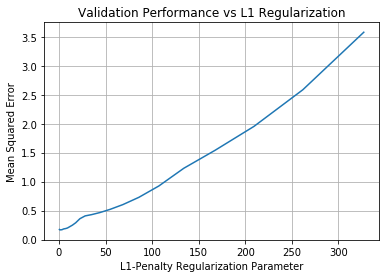

In [25]:
from scipy.linalg import norm

nsamples, ftr_nums = X_train.shape
w = np.zeros(ftr_nums)

l1reg_max = 2*norm(X_train.T.dot(y_train), np.inf)
l1reg_list = l1reg_max * 0.8 **(np.arange(0,30))
l1reg_loss = []

for l1reg in l1reg_list:
    lasso_regression_estimator = LassoRegression(l1reg=l1reg, random=False)
    lasso_regression_estimator.fit(X_train, y_train, w)
    l1reg_loss.append(lasso_regression_estimator.score(X_val, y_val))
    w = lasso_regression_estimator.w_
    # print('l1 reg {}, square loss {}'.format(l1reg, l1reg_loss[-1]))
    
# Plot validation performance vs regularization parameter
fig, ax = plt.subplots()
ax.plot(l1reg_list, l1reg_loss)
ax.grid()
ax.set_title("Validation Performance vs L1 Regularization")
ax.set_xlabel("L1-Penalty Regularization Parameter")
ax.set_ylabel("Mean Squared Error")

## 4 Lasso Properties

### 4.1 Deriving $λ_{max}$

In this problem we will derive an expression for $\lambda_{max}$. For the first three parts, use the Lasso objective function excluding the bias term i.e, $J(w) = ||Xw − y||^2 + \lambda ||w||_1$. We will show that for any $\lambda \geq 2||X^T y||_{\infty}$, the estimated weight vector $\hat{w}$ is entirely zero, where $||\bullet||_{\infty}$ is the infinity norm (or supremum norm), which is the maximum absolute value of any component of the vector.


1. The one-sided directional derivative of $f(x)$ at $x$ in the direction $v$ is defined as:
$$f'(x;v)=\lim_{h\downarrow 0} \frac{f(x+hv)-f(x)}{h}$$
Compute $J'(0;v)$. That is, compute the one-sided directional derivative of $J(w)$ at $w = 0$ in the direction $v$. Hint: the result should be in terms of $X$, $y$, $\lambda$, and $v$.


**Answer**:
$$J'(0;v) = 2v^T(X^T(-y)) + \lambda \nabla_{w} loss(w)$$
Where $\nabla_{w=0} loss(w) \in [-1, 1].$

2. Since the Lasso objective is convex, $w^*$ is a minimizer of $J(w)$ if and only if the directional derivative $J′(w^∗;v) \geq 0$ for all $v \neq 0$. Show that for any $v \neq 0$, we have $J′(0;v) \geq 0$ if and only if $\lambda \geq C$, for some $C$ that depends on $X$, $y$, and $v$. You should have an explicit expression for $C$.

**Answer**: 
if $J′(0;v) \geq 0$, we need $2v^T X^T(-y)+\lambda loss(w) \geq 0$; so if $C = 2v^T(X^Ty)$ and $\lambda \geq C$ , we can have $J′(0;v) \geq 0$. 

3. In the previous problem, we get a different lower bound on $\lambda$ for each choice of $v$. Show that the maximum of these lower bounds on $\lambda$ is $\lambda_{max}=2||X^T y||_{\infty}$. Conclude that $w = 0$ is a minimizer of $J(w)$ if and only if $\lambda \geq 2||X^T y||_{\infty}$.

**Answer**: Since if $\lambda \geq C$, we always have $J'(0;v) \geq 0$ for each choic of $v$ at $w=0$, so we can conclude that $w=0$ is a minimizer of $J(w)$.

### 4.2 Feature Correlation

In this problem, we will examine and compare the behavior of the Lasso and ridge regression in the case of an exactly repeated feature. That is, consider the design matrix $X \in R^{m×d}$, where $X_{·i} = X_{·j}$ for some $i$ and $j$, where $X_{.i}$ is the $i$th column of $X$. We will see that ridge regression divides the weight equally among identical features, while Lasso divides the weight arbitrarily. In an optional part to this problem, we will consider what changes when $X_{·i}$ and $X_{·j}$ are highly correlated (e.g. exactly the same except for some small random noise) rather than exactly the same.

1. Without loss of generality, assume the first two colums of $X$ are our repeated features. Partition $X$ and $\theta$ as follows:
$$
X=\begin{pmatrix}x1 & x2 & X_r\end{pmatrix}
\qquad
\theta=\begin{pmatrix}\theta_1\\ \theta_2\\ \theta_r \end{pmatrix}
$$
We can write the Lasso objective function as:
$$
\begin{align*}
J(\theta)= & \left\Vert X\theta-y\right\Vert _{2}^{2}+\lambda\left\Vert \theta\right\Vert _{1}\\
= & \left\Vert x_{1}\theta_{1}+x_{2}\theta_{2}+X_{r}\theta_{r}-y\right\Vert _{2}^{2}+\lambda\vert\theta_{1}\vert+\lambda\vert\theta_{2}\vert+\lambda\left\Vert \theta_{r}\right\Vert _{1}
\end{align*}
$$
With repeated features, there will be multiple minimizers of $J(θ)$. Suppose that
$$\hat{\theta}=\begin{pmatrix}a\\
b\\
r
\end{pmatrix}$$
is a minimizerof $J(θ)$. Give conditions on $c$ and $d$ such that $(c,d,r^T)^T$ is also a minimizerof $J(θ)$. Hint: First show that $a$ and $b$ must have the same sign, or at least one of them is zero. Then, using this result, rewrite the optimization problem to derive a relation between $a$ and $b$.

**Answer**: If we assume $a$ and $b$ have different sign ($a>0$ and $b<0$)and either of them are $0$s, we can derive the derivative of loss function $J(\theta)$, then we can have the same formular for partial derivative with respect to $a$ and $b$ except regualized term $\pm \lambda$, which cannot subject to partial derivative equals to zeros at the same time. So $a$ and $b$ should be the same sign or at least one of them is zero. $\theta_2 = -\theta_1 + (-\lambda sign(c) - X_r \theta_r + y)/(x_1^T x_1)$.


2. Using the same notation as the previous problem, suppose
$$\hat{\theta}=\begin{pmatrix}a\\
b\\
r
\end{pmatrix}$$
minimizes the ridge regression objective function. What is the relationship between $a$ and $b$, and why?

**Answer**: When computing partial with respect to $a$ and $b$, both are the same values, so $a$ and $b$ should be equal.